Problem Set 2

CS 6375

Due: 3/6/2022 by 11:59pm

Note: all answers should be accompanied by explanations and relevant code for full credit. All
code (Python or MATLAB only) should be turned in with your answers to the following questions. Python is preferred.  
Late homeworks will not be accepted. 

The following code help you download the data files needed for the problems below. After running code, these files will appear in the current folder.

In [ ]:
# Downloading data files for you.
# Remember to run this cell!!

!wget -nc https://personal.utdallas.edu/~yangxiao.lu/22SP_CS6375/mush_test.data
!wget -nc https://personal.utdallas.edu/~yangxiao.lu/22SP_CS6375/mush_train.data
!wget -nc https://personal.utdallas.edu/~yangxiao.lu/22SP_CS6375/park_test.data
!wget -nc https://personal.utdallas.edu/~yangxiao.lu/22SP_CS6375/park_train.data
!wget -nc https://personal.utdallas.edu/~yangxiao.lu/22SP_CS6375/park_validation.data
!wget -nc https://personal.utdallas.edu/~yangxiao.lu/22SP_CS6375/wdbc_test.data
!wget -nc https://personal.utdallas.edu/~yangxiao.lu/22SP_CS6375/wdbc_train.data


File ‘mush_test.data’ already there; not retrieving.

File ‘mush_train.data’ already there; not retrieving.

File ‘park_test.data’ already there; not retrieving.

File ‘park_train.data’ already there; not retrieving.

File ‘park_validation.data’ already there; not retrieving.

File ‘wdbc_test.data’ already there; not retrieving.

File ‘wdbc_train.data’ already there; not retrieving.



In [ ]:
import numpy as np
from collections import defaultdict
import pandas as pd

# Problem 1 : Parkinson’s Disease (40 pts)

For this problem, you will use the cancer data set provided with this problem set. The data has been
divided into three pieces park train.data, park validation.data, and park test.data. These data sets
were generated using the UCI Parkinsons Data Set data set (follow the link for information about
the format of the data). Note that class label, health status of the subject, is the first column in
the data set. All code (Python or MATLAB only) should be turned in with your answers to the
following questions.

## 1. Primal SVMs



### (a) Using gradient descent or quadratic programming, apply the SVM with slack formulation to train a classifier for each choice of $c \in \{10^{-4}, 10^{-3}, ..., 10^3, 10^4\}$ without using any feature maps.

In [ ]:
# To be completed
def primal_svm_solver(c = None, X = None, Y = None):
  W = np.zeros(len(X[0]))
  b = 0
  # epochs = 3000000
  epochs = 1000000
  index = 0
  step_size = 0.001
  perceptron_loss = 1000
  while perceptron_loss > 0.001 and index < epochs:
    WX = np.sum(np.multiply(W, X), axis=1)
    linear_sum = WX + b
    y_linear_sum_mult = np.multiply(Y, linear_sum.reshape(-1, 1))
    y_linear_sum_mult = (1 - y_linear_sum_mult)
    perceptron_loss = np.maximum(y_linear_sum_mult, 0)
    perceptron_loss = np.multiply(c, np.sum(perceptron_loss)) + np.multiply(0.5, np.matmul(W.T, W))
    
    mask = (y_linear_sum_mult > 0).astype(int)
    w_grad = np.multiply(-Y, X)
    w_grad = np.multiply(c, w_grad)
    w_grad = np.multiply(mask, w_grad)
    w_grad = np.add(W.reshape(1, -1), w_grad)
    w_grad = np.sum(w_grad, axis=0)
    w_grad = np.multiply(step_size, w_grad)
    W = np.subtract(W, w_grad)

    b_grad = np.multiply(-1, Y)
    b_grad = np.multiply(mask, b_grad)
    b_grad = np.multiply(c, b_grad)
    b_grad = np.sum(b_grad, axis=0)
    b_grad = np.multiply(step_size, b_grad)
    b = np.subtract(b, b_grad)
    index += 1
  return W, b

### (b) What is the accuracy of the learned classifier on the training set for each value of $c$?

In [ ]:
accuracy_metrics = defaultdict(lambda: defaultdict(int))
park_data = np.genfromtxt('./park_train.data',delimiter=',')
num_samples = len(park_data)
Y = park_data[:,0]
Y = np.array(list(map(lambda x: 1 if x == 1 else -1, Y)))
X = park_data[:,1:]
Y = Y.reshape(-1,1)
for c in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]:
  W, b = primal_svm_solver(c = c, X = X, Y = Y)
  WX = np.sum(np.multiply(W, X), axis=1)
  linear_sum = WX + b
  accuracy_metrics[c]['W'] = W
  accuracy_metrics[c]['b'] = b
  correct_val = 0
  for i in range(num_samples):
    if Y[i] * linear_sum[i] >= 0:
      correct_val += 1
  accuracy = correct_val / num_samples
  accuracy_metrics[c]['accuracy'] = accuracy

In [ ]:
accuracy_metrics

defaultdict(<function __main__.<lambda>>,
            {0.0001: defaultdict(int,
                         {'W': array([-1.07862047e-04, -4.99933125e-04, -4.67171372e-04,  8.10444399e-08,
                                  6.41942587e-10,  4.98595169e-08,  4.80840585e-08,  1.49547220e-07,
                                  5.11687695e-07,  4.95577383e-06,  2.72623234e-07,  3.09267095e-07,
                                  4.02260240e-07,  8.17904113e-07,  4.51541649e-07, -2.87354433e-05,
                                  2.24131259e-06,  2.24186354e-06,  1.76950906e-05,  2.35063387e-06,
                                  1.25964976e-05,  2.92419304e-06]),
                          'accuracy': 0.782051282051282,
                          'b': array([1.1118487])}),
             0.001: defaultdict(int,
                         {'W': array([ 2.81986335e-04, -9.00152390e-04, -3.52903463e-03,  6.74820953e-07,
                                  4.52721883e-09,  4.27567194e-07,  4.11173962e-07,  1.2

In [ ]:
for c, acc_dict in accuracy_metrics.items():
  print("C:", c, "Acc:", acc_dict['accuracy'])

C: 0.0001 Acc: 0.782051282051282
C: 0.001 Acc: 0.782051282051282
C: 0.01 Acc: 0.8205128205128205
C: 0.1 Acc: 0.6410256410256411
C: 1 Acc: 0.782051282051282
C: 10 Acc: 0.782051282051282
C: 100 Acc: 0.782051282051282
C: 1000 Acc: 0.8205128205128205
C: 10000 Acc: 0.6538461538461539


### (c) Use the validation set to select the best value of $c$. What is the accuracy on the validation set for each value of $c$?

In [ ]:
# To be completed
valid_accuracy_metrics = defaultdict(lambda: defaultdict(int))
park_data = np.genfromtxt('./park_validation.data',delimiter=',')
num_samples = len(park_data)
Y = park_data[:,0]
Y = np.array(list(map(lambda x: 1 if x == 1 else -1, Y)))
X = park_data[:,1:]
Y = Y.reshape(-1,1)
best_accuracy = None
best_W = None
best_b = None
best_c = None
for c in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]:
  W = accuracy_metrics[c]['W']
  b = accuracy_metrics[c]['b']
  WX = np.sum(np.multiply(W, X), axis=1)
  linear_sum = WX + b
  correct_val = 0
  for i in range(num_samples):
    if Y[i] * linear_sum[i] >= 0:
      correct_val += 1
  accuracy = correct_val / num_samples
  if not best_accuracy or accuracy > best_accuracy:
    best_accuracy = accuracy
    best_W = W
    best_b = b
    best_c = c
  valid_accuracy_metrics[c]['accuracy'] = accuracy
  valid_accuracy_metrics[c]['W'] = W
  valid_accuracy_metrics[c]['b'] = b

In [ ]:
valid_accuracy_metrics

defaultdict(<function __main__.<lambda>>,
            {0.0001: defaultdict(int,
                         {'W': array([-1.07862047e-04, -4.99933125e-04, -4.67171372e-04,  8.10444399e-08,
                                  6.41942587e-10,  4.98595169e-08,  4.80840585e-08,  1.49547220e-07,
                                  5.11687695e-07,  4.95577383e-06,  2.72623234e-07,  3.09267095e-07,
                                  4.02260240e-07,  8.17904113e-07,  4.51541649e-07, -2.87354433e-05,
                                  2.24131259e-06,  2.24186354e-06,  1.76950906e-05,  2.35063387e-06,
                                  1.25964976e-05,  2.92419304e-06]),
                          'accuracy': 0.7413793103448276,
                          'b': array([1.1118487])}),
             0.001: defaultdict(int,
                         {'W': array([ 2.81986335e-04, -9.00152390e-04, -3.52903463e-03,  6.74820953e-07,
                                  4.52721883e-09,  4.27567194e-07,  4.11173962e-07,  1.

In [ ]:
for c, valid_dict in valid_accuracy_metrics.items():
  print(c, valid_dict['accuracy'])

0.0001 0.7413793103448276
0.001 0.7413793103448276
0.01 0.8103448275862069
0.1 0.7241379310344828
1 0.7413793103448276
10 0.7413793103448276
100 0.7413793103448276
1000 0.7413793103448276
10000 0.7413793103448276


In [ ]:
best_accuracy

0.8103448275862069

In [ ]:
best_c

0.01

### (d) Report the accuracy on the test set for the selected classifier

In [ ]:
valid_accuracy_metrics = defaultdict(lambda: defaultdict(int))
park_data = np.genfromtxt('./park_test.data',delimiter=',')
num_samples = len(park_data)
test_accuracy = None
Y = park_data[:,0]
Y = np.array(list(map(lambda x: 1 if x == 1 else -1, Y)))
X = park_data[:,1:]
Y = Y.reshape(-1,1)
best_accuracy = None
best_W = None
best_b = None
W = accuracy_metrics[best_c]['W']
b = accuracy_metrics[best_c]['b']
WX = np.sum(np.multiply(W, X), axis=1)
linear_sum = WX + b
correct_val = 0
for i in range(num_samples):
  if Y[i] * linear_sum[i] >= 0:
    correct_val += 1
accuracy = correct_val / num_samples
test_accuracy = accuracy

In [ ]:
test_accuracy

0.7796610169491526

## 2. Dual SVMs with Gaussian Kernels

### (a) Using quadratic programming, apply the dual of the SVM with slack formulation to train a classifier for each choice of $c \in \{10^{-4}, 10^{-3}, ..., 10^3, 10^4\}$ using a Gaussian kernel with $\sigma^2 \in \{10^{-3}, ..., 10^{3}\}$.

In [ ]:
from cvxopt import matrix, solvers
from numpy import linalg as LA

In [ ]:
def gaussian_kernel(x, y, gamma=0.5):
    return np.exp(-((1/(2*gamma))) * (LA.norm(x - y) ** 2))

In [ ]:
def quad_solver_modified(X_1=None, X_2=None, Y_1=None, Y_2=None, variance=None, c_value=None):
    n = X_1.shape[0]
    gaussian_matrix = np.zeros((len(X_1), len(X_2)))
    for i in range(len(X_1)):
      for j in range(len(X_2)):
        gaussian_matrix[i,j] = gaussian_kernel(X_1[i], X_2[j], gamma=variance)
    H = np.multiply(np.matmul(Y_1, Y_2.T), gaussian_matrix)
    q = np.repeat([-1.0], n)
    A = Y.reshape(1, -1)
    b = np.zeros(1)
    G = np.vstack((np.negative(np.eye(n)), np.eye(n)))
    h = np.hstack((np.zeros(n), np.ones(n) * c_value))
    A = A.astype('float')
    P = matrix(H)
    q = matrix(q)
    G = matrix(G)
    h = matrix(h)
    A = matrix(A)
    b = matrix(b)
    sol = solvers.qp(P, q, G, h, A, b)
    alphas = np.array(sol["x"])
    support_vector_ids = np.where((alphas > 1e-5) & (alphas < c))[0]
    count = 0
    bias = 0
    total = 0
    correct = 0
    for s_idx in support_vector_ids:
      weight = np.sum(alphas.reshape(-1) * Y_1 * gaussian_matrix[:, s_idx])
      labels = Y_1[s_idx]
      count += 1
      bias += (labels - weight)
    if count != 0:
      bias/=count
    total = 0
    correct = 0
    for i in range(X_2.shape[0]):
      weight_pred = np.sum(alphas.reshape(-1)*Y_1*gaussian_matrix[:, i])
      raw_pred = weight_pred + bias
      pred = 1 if raw_pred>=0 else -1
      correct += 1 if pred==Y_2[i] else 0
      total += 1
    accuracy = correct / total
    return alphas, bias, accuracy

### (b) What is the accuracy of the learned classifier on the training set for each pair of $c$ and $\sigma^2$?

In [ ]:
park_data = np.genfromtxt('./park_train.data',delimiter=',')
num_samples = len(park_data)
Y = park_data[:,0]
Y = np.array(list(map(lambda x: 1 if x == 1 else -1, Y)))
X = park_data[:,1:]
parameters_dict = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))
for c_value in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]:
  for sig_sq in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    alphas, bias, accuracy = quad_solver_modified(X_1=X, X_2=X, Y_1=Y, Y_2=Y, variance=sig_sq, c_value=c_value)
    parameters_dict[c_value][sig_sq]['alphas'] = alphas
    parameters_dict[c_value][sig_sq]['bias'] = bias
    parameters_dict[c_value][sig_sq]['accuracy'] = accuracy

     pcost       dcost       gap    pres   dres
 0: -3.4068e-01 -3.3215e-01  2e+02  1e+01  2e-16
 1: -3.3915e-01 -3.0200e-01  5e+00  4e-01  5e-16
 2: -6.5979e-03 -1.1944e-02  6e-02  4e-03  2e-16
 3: -3.3802e-03 -9.0459e-03  6e-03  2e-05  4e-16
 4: -3.3869e-03 -3.4660e-03  8e-05  2e-07  1e-16
 5: -3.3915e-03 -3.3923e-03  8e-07  2e-09  3e-17
 6: -3.3915e-03 -3.3915e-03  8e-09  2e-11  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.4068e-01 -3.3215e-01  2e+02  1e+01  2e-16
 1: -3.3915e-01 -3.0200e-01  5e+00  4e-01  5e-16
 2: -6.5979e-03 -1.1944e-02  6e-02  4e-03  2e-16
 3: -3.3802e-03 -9.0459e-03  6e-03  2e-05  4e-16
 4: -3.3869e-03 -3.4660e-03  8e-05  2e-07  1e-16
 5: -3.3915e-03 -3.3923e-03  8e-07  2e-09  3e-17
 6: -3.3915e-03 -3.3915e-03  8e-09  2e-11  2e-16
Optimal solution found.
     pcost       dcost       gap    pres   dres
 0: -3.4068e-01 -3.3215e-01  2e+02  1e+01  2e-16
 1: -3.3915e-01 -3.0200e-01  5e+00  4e-01  5e-16
 2: -6.5979e-03 -1.1944e

In [ ]:
for c_val, sig_ma_dict in parameters_dict.items():
  for sig_sq, inner_obj in sig_ma_dict.items():
    print("C:", c_val, "sig_sq:", sig_sq, "Accuracy:", inner_obj['accuracy'])

C: 0.0001 sig_sq: 0.001 Accuracy: 0.782051282051282
C: 0.0001 sig_sq: 0.01 Accuracy: 0.782051282051282
C: 0.0001 sig_sq: 0.1 Accuracy: 0.782051282051282
C: 0.0001 sig_sq: 1 Accuracy: 0.782051282051282
C: 0.0001 sig_sq: 10 Accuracy: 0.782051282051282
C: 0.0001 sig_sq: 100 Accuracy: 0.782051282051282
C: 0.0001 sig_sq: 1000 Accuracy: 0.782051282051282
C: 0.001 sig_sq: 0.001 Accuracy: 0.782051282051282
C: 0.001 sig_sq: 0.01 Accuracy: 0.782051282051282
C: 0.001 sig_sq: 0.1 Accuracy: 0.782051282051282
C: 0.001 sig_sq: 1 Accuracy: 0.782051282051282
C: 0.001 sig_sq: 10 Accuracy: 0.782051282051282
C: 0.001 sig_sq: 100 Accuracy: 0.782051282051282
C: 0.001 sig_sq: 1000 Accuracy: 0.782051282051282
C: 0.01 sig_sq: 0.001 Accuracy: 1.0
C: 0.01 sig_sq: 0.01 Accuracy: 1.0
C: 0.01 sig_sq: 0.1 Accuracy: 1.0
C: 0.01 sig_sq: 1 Accuracy: 1.0
C: 0.01 sig_sq: 10 Accuracy: 0.9615384615384616
C: 0.01 sig_sq: 100 Accuracy: 0.782051282051282
C: 0.01 sig_sq: 1000 Accuracy: 0.782051282051282
C: 0.1 sig_sq: 0.001 Ac

(c) Use the validation set to select the best value of $c$ and $\sigma^2$. What is the accuracy on the validation set for each pair of $c$ and $\sigma^2$?

In [ ]:
park_data = np.genfromtxt('./park_train.data',delimiter=',')
Y = park_data[:,0]
Y = np.array(list(map(lambda x: 1 if x == 1 else -1, Y)))
X = park_data[:,1:]

park_data_valid = np.genfromtxt('./park_validation.data',delimiter=',')
Y_valid = park_data_valid[:,0]
Y_valid = np.array(list(map(lambda x: 1 if x == 1 else -1, Y_valid)))
X_valid = park_data_valid[:,1:]
valid_params_dict = defaultdict(lambda: defaultdict(lambda: defaultdict(int)))
best_accuracy = None
best_c = None
best_sigma_sq = None
gaussian_matrix = np.zeros((len(X), len(X_valid)))
for c_value in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]:
  for sig_sq in [0.001, 0.01, 0.1, 1, 10, 100, 1000]:
    for i in range(len(X)):
      for j in range(len(X_valid)):
        gaussian_matrix[i,j] = gaussian_kernel(X[i], X_valid[j], gamma=sig_sq)
    alphas = parameters_dict[c_value][sig_sq]['alphas']
    bias = parameters_dict[c_value][sig_sq]['bias']
    correct = 0
    total = 0
    for i in range(X_valid.shape[0]):
      weight_pred = np.sum(alphas.reshape(-1)*Y*gaussian_matrix[:, i])
      raw_pred = weight_pred + bias
      pred = 1 if raw_pred>=0 else -1
      correct += 1 if pred==Y_valid[i] else 0
      total += 1
    accuracy = correct / total
    valid_params_dict[c_value][sig_sq]['alphas'] = alphas
    valid_params_dict[c_value][sig_sq]['bias'] = bias
    valid_params_dict[c_value][sig_sq]['accuracy'] = accuracy
    if not best_accuracy or accuracy > best_accuracy:
        best_accuracy = accuracy
        best_c = c_value
        best_sigma_sq = sig_sq

In [ ]:
for c_val, sig_ma_dict in valid_params_dict.items():
  for sig_sq, inner_obj in sig_ma_dict.items():
    print("C:", c_val, "sig_sq:", sig_sq, "Accuracy:", inner_obj['accuracy'])

C: 0.0001 sig_sq: 0.001 Accuracy: 0.7413793103448276
C: 0.0001 sig_sq: 0.01 Accuracy: 0.7413793103448276
C: 0.0001 sig_sq: 0.1 Accuracy: 0.7413793103448276
C: 0.0001 sig_sq: 1 Accuracy: 0.7413793103448276
C: 0.0001 sig_sq: 10 Accuracy: 0.7413793103448276
C: 0.0001 sig_sq: 100 Accuracy: 0.7413793103448276
C: 0.0001 sig_sq: 1000 Accuracy: 0.7413793103448276
C: 0.001 sig_sq: 0.001 Accuracy: 0.7413793103448276
C: 0.001 sig_sq: 0.01 Accuracy: 0.7413793103448276
C: 0.001 sig_sq: 0.1 Accuracy: 0.7413793103448276
C: 0.001 sig_sq: 1 Accuracy: 0.7413793103448276
C: 0.001 sig_sq: 10 Accuracy: 0.7413793103448276
C: 0.001 sig_sq: 100 Accuracy: 0.7413793103448276
C: 0.001 sig_sq: 1000 Accuracy: 0.7413793103448276
C: 0.01 sig_sq: 0.001 Accuracy: 0.7413793103448276
C: 0.01 sig_sq: 0.01 Accuracy: 0.7241379310344828
C: 0.01 sig_sq: 0.1 Accuracy: 0.8103448275862069
C: 0.01 sig_sq: 1 Accuracy: 0.8275862068965517
C: 0.01 sig_sq: 10 Accuracy: 0.7758620689655172
C: 0.01 sig_sq: 100 Accuracy: 0.74137931034482

In [ ]:
best_c

0.01

In [ ]:
best_sigma_sq

1

In [ ]:
best_accuracy

0.8275862068965517

### (d) Report the accuracy on the test set for the selected classifier.

In [ ]:
park_data = np.genfromtxt('./park_train.data',delimiter=',')
Y = park_data[:,0]
Y = np.array(list(map(lambda x: 1 if x == 1 else -1, Y)))
X = park_data[:,1:]

park_data_test = np.genfromtxt('./park_test.data',delimiter=',')
Y_test = park_data_test[:,0]
Y_test = np.array(list(map(lambda x: 1 if x == 1 else -1, Y_test)))
X_test = park_data_test[:,1:]

c_value = best_c
sig_sq = best_sigma_sq
gaussian_matrix = np.zeros((len(X), len(X_test)))
for i in range(len(X)):
  for j in range(len(X_test)):
    gaussian_matrix[i,j] = gaussian_kernel(X[i], X_test[j], gamma=sig_sq)
alphas = parameters_dict[c_value][sig_sq]['alphas']
bias = parameters_dict[c_value][sig_sq]['bias']

correct = 0
total = 0

for i in range(X_test.shape[0]):
  weight_pred = np.sum(alphas.reshape(-1)*Y*gaussian_matrix[:, i])
  raw_pred = weight_pred + bias
  pred = 1 if raw_pred>=0 else -1
  correct += 1 if pred==Y_test[i] else 0
  total += 1
accuracy = correct / total
print("Test Accuracy is:", accuracy)

Test Accuracy is: 0.8135593220338984


## 3. Which of these approaches (if any) should be preferred for this classification task? Explain.

Write your explanation here.

# Problem 2: Method of Lagrange Multipliers (15 pts)

Suppose that we modified the objective function in the SVM with slack formulation to be a quadratic
penalty instead of a linear penalty, that is minimize $\frac{1}{2}\Vert w\Vert^2 +c\sum_i \xi_i^2$ subject to the same constraints as the standard SVM with slack. What is the dual of this new quadratic penalized SVM with slack problem for a fixed c? Can the kernel trick still be applied?

In [ ]:
# Attached the pdf in e-learning for this question

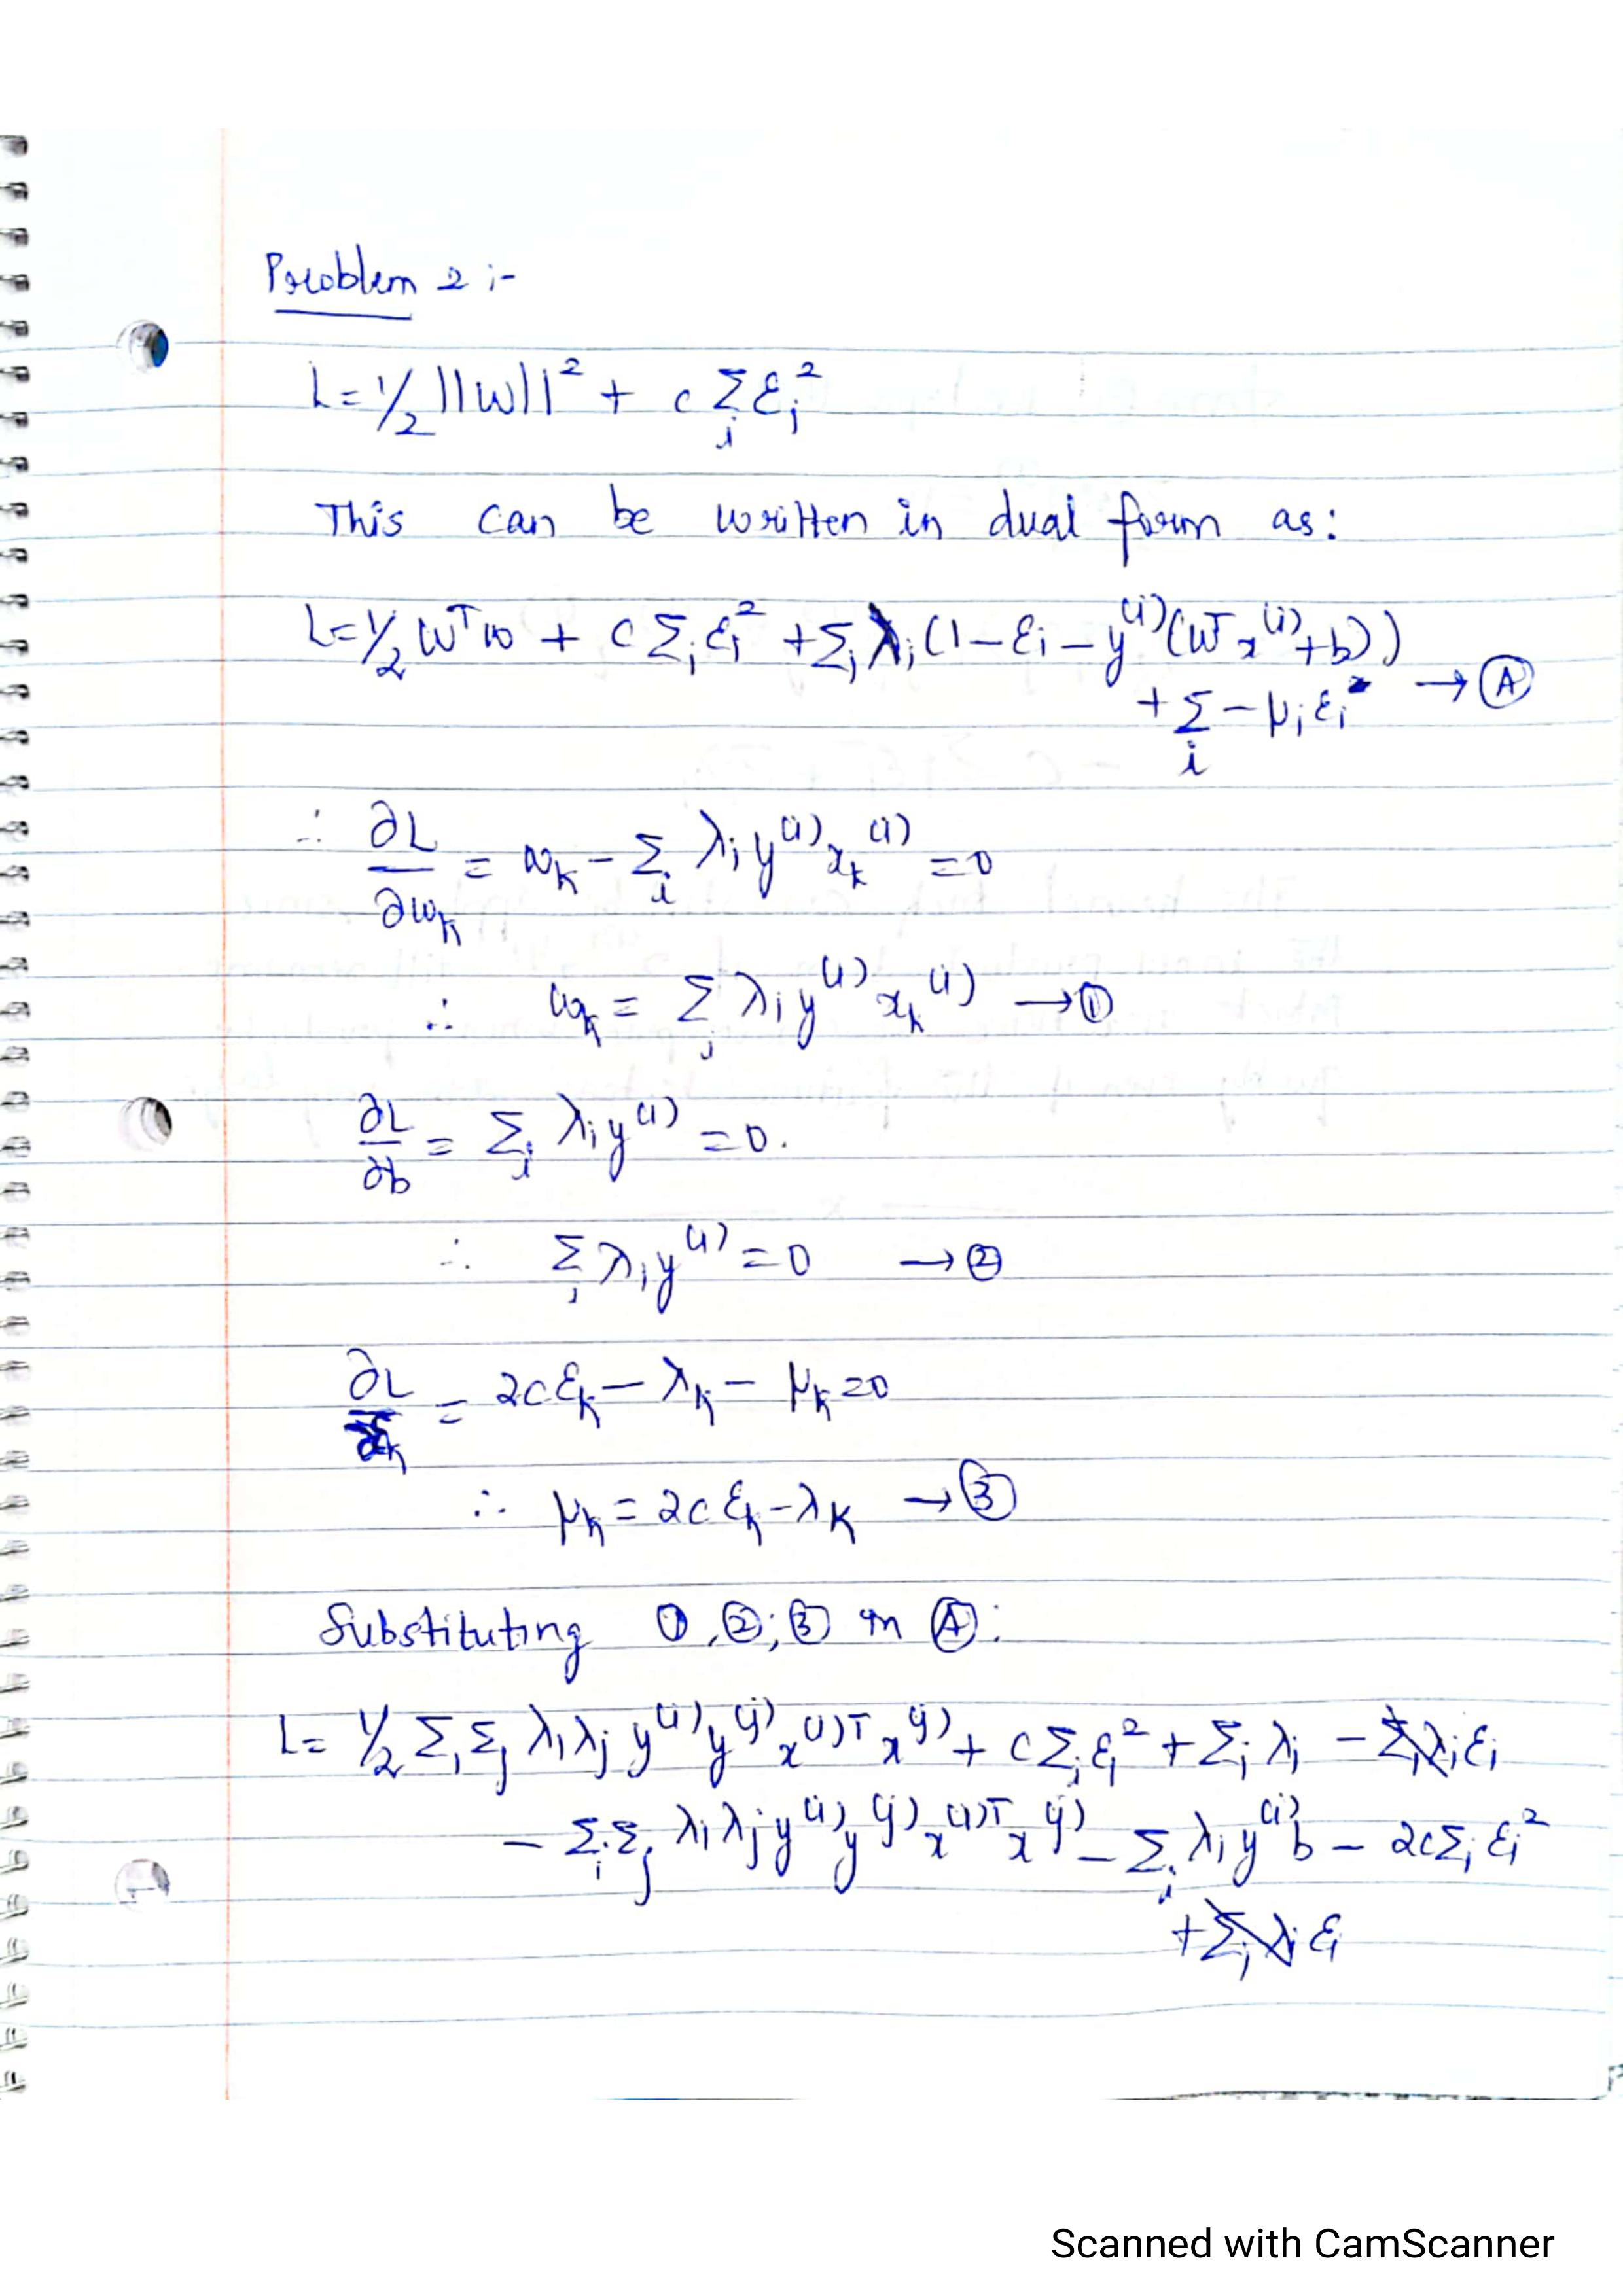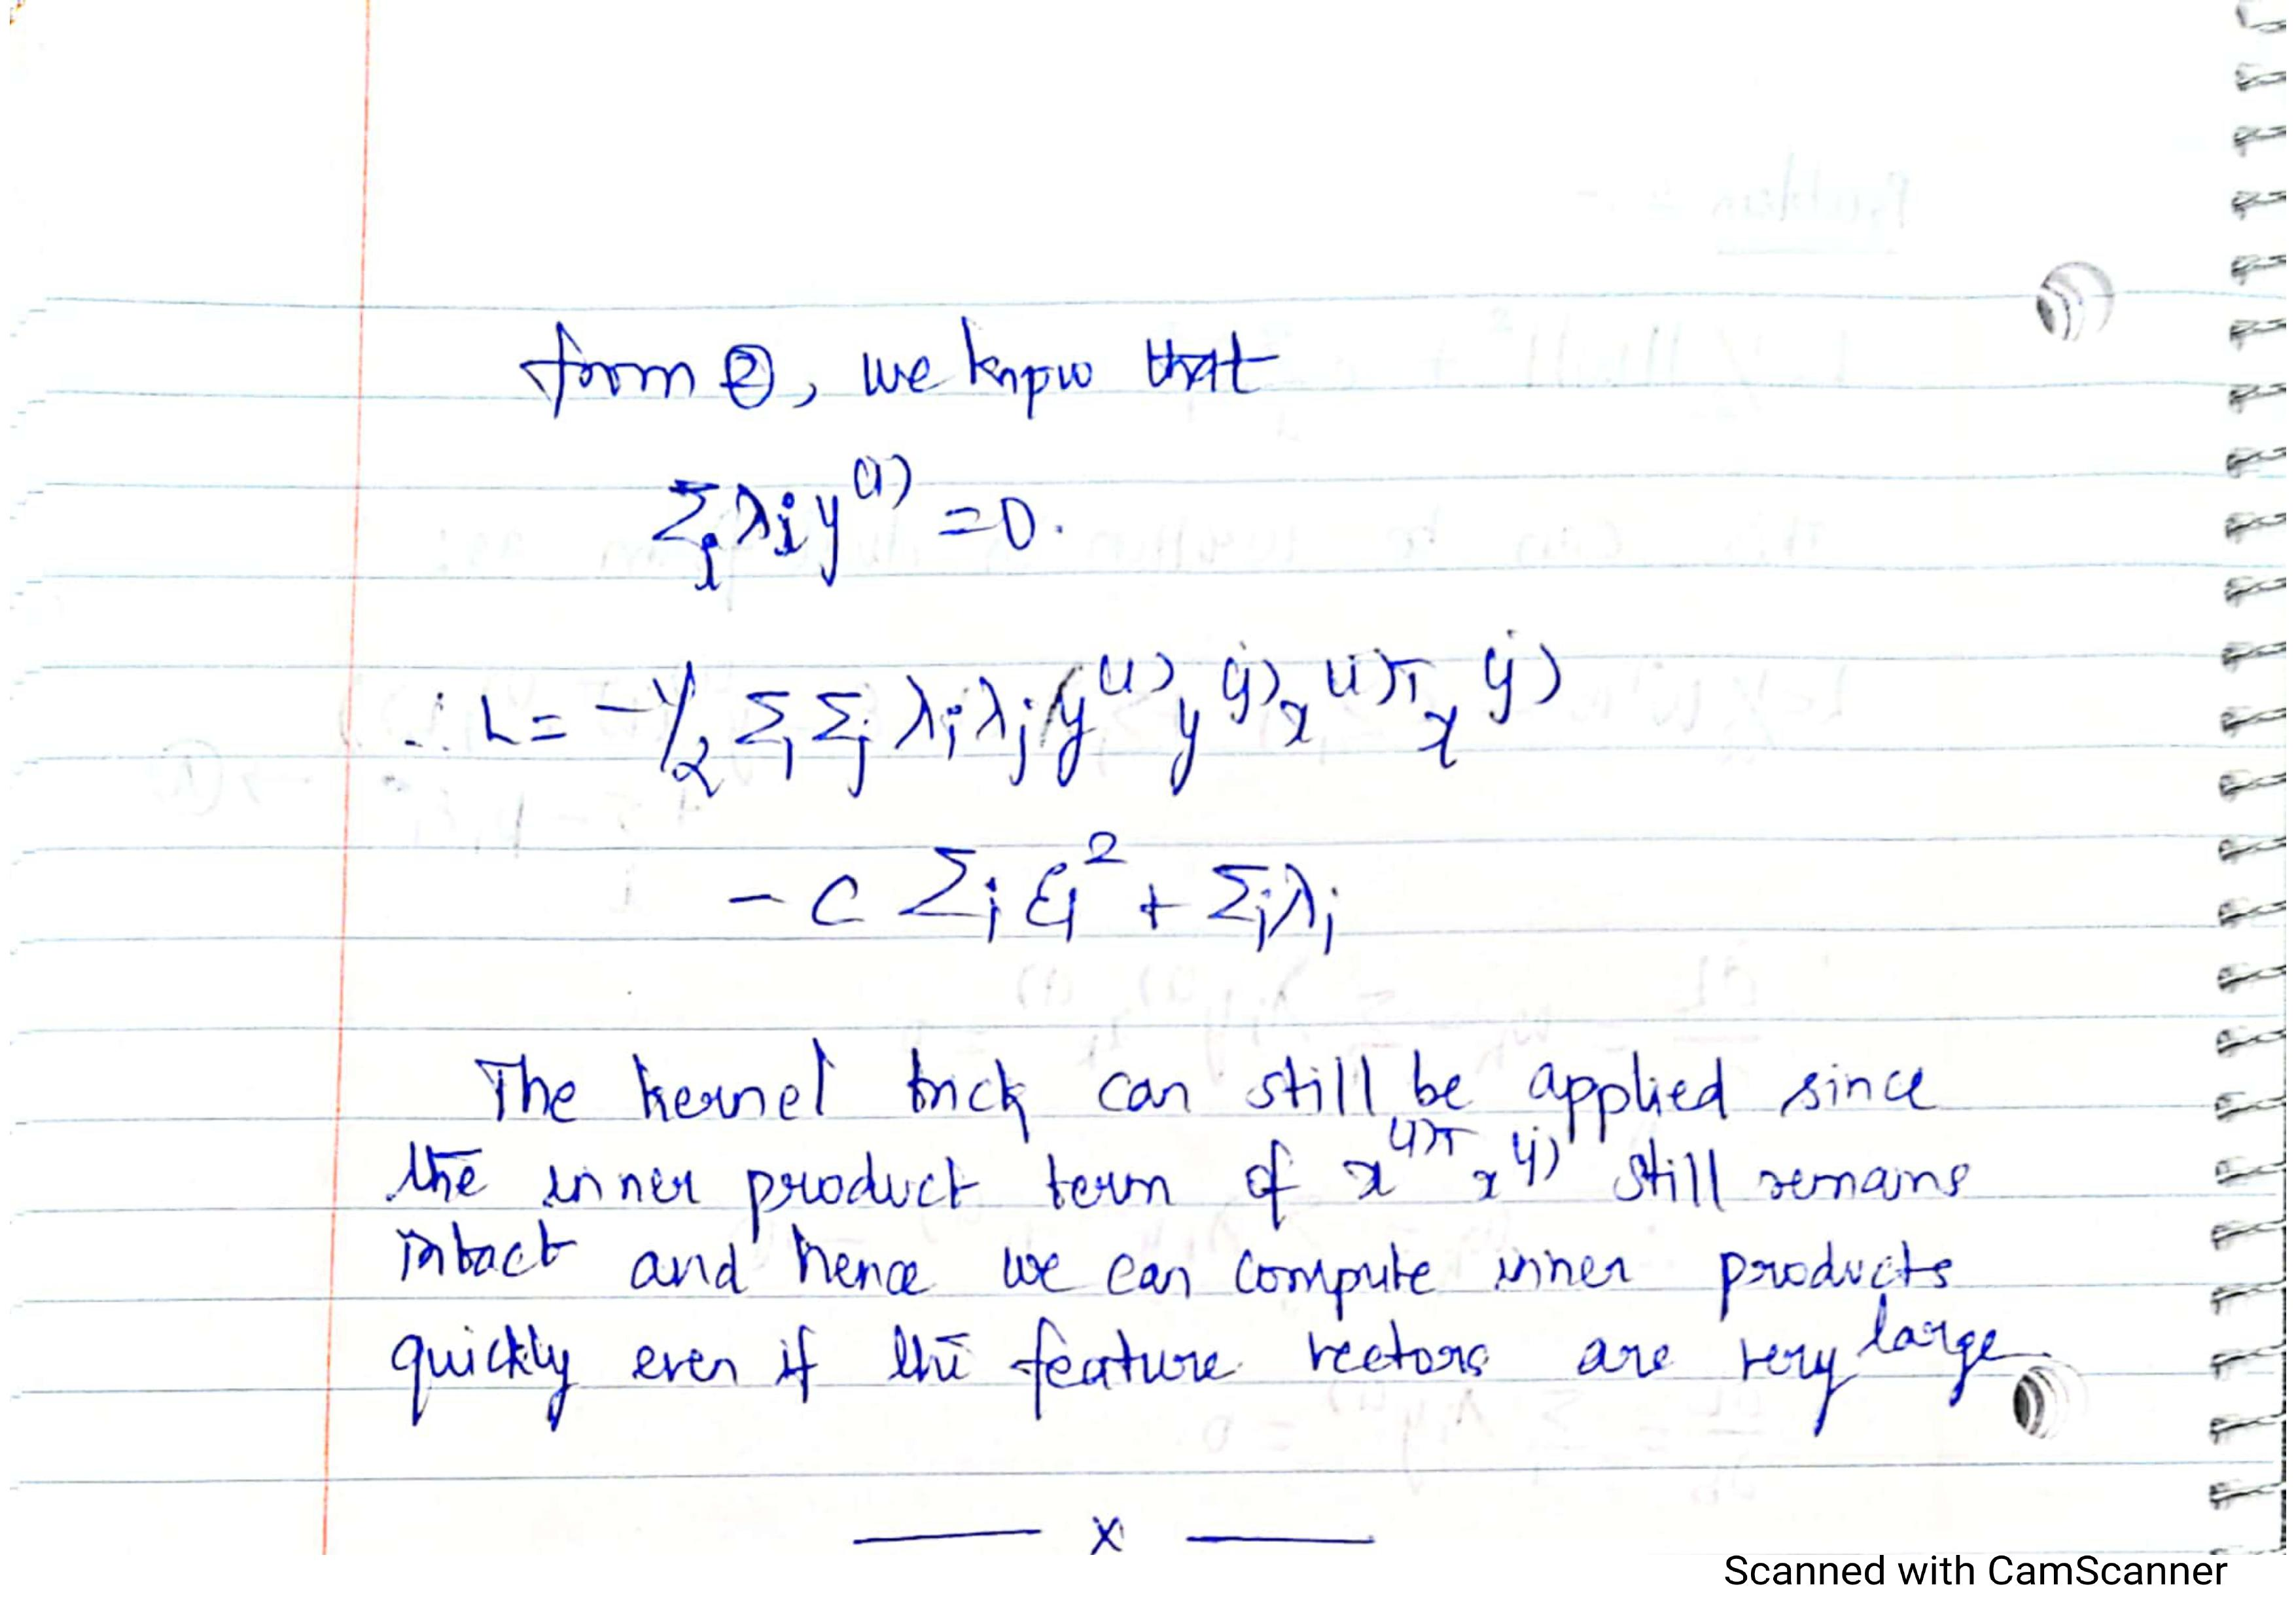

# Problem 3: Poisonous Mushrooms? (25 pts)
For this problem, you will use the mushroom data set provided with this problem set. The data has
been divided into two pieces mush train.data and mush test.data. These data sets were generated
using the UCI Mushroom data set (follow the link for information about the format of the data).
Note that the class label is the first column in the data set.

## 1. Assuming you break ties using the attribute that occurs **last** (left to right) in the data, draw the resulting decision tree and report the maximum information gain for each node that you added to the tree.

In [ ]:
import pandas as pd
from collections import defaultdict
import math

In [ ]:
cols = ["Y", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", "ring-number", "ring-type", "spore-print-color", "population", "habitat"]
mushroom_df = pd.read_csv('mush_train.data', names = cols, header=None, index_col=False)

In [ ]:
information_gain_dict = defaultdict(lambda: defaultdict(list))
dt_dict = dict()
decision_tree = dict()
class ChildrenNode:
  def __init__(self, X=None, depth=None):
    self.X = X
    self.depth = depth
    self.children = dict()
    self.end_value = None
    self.split_column = None
    self.information_gain_val = None
  
  def information_gain(self, col_considered=None):
    unique_col_values = self.X[col_considered].unique()
    count_dictionary = defaultdict(int)
    for uniq_val in unique_col_values:
      count_dictionary[uniq_val] = len(self.X[self.X[col_considered] == uniq_val])
    total_len = len(self.X)
    conditional_entropy = 0
    col_split = defaultdict(lambda: defaultdict(int))
    for uniq_val in unique_col_values:
      col_split[uniq_val]["p"] = len(self.X[(self.X[col_considered] == uniq_val) & (self.X["Y"] == "p")])
      col_split[uniq_val]["e"] = len(self.X[(self.X[col_considered] == uniq_val) & (self.X["Y"] == "e")])
      multiplication_term = count_dictionary[uniq_val] / len(self.X)
      if col_split[uniq_val]["p"] != 0:
        p_log = -1 * (col_split[uniq_val]["p"] / count_dictionary[uniq_val]) * math.log((col_split[uniq_val]["p"]/count_dictionary[uniq_val]), 2)
      else:
        p_log = 0
      if col_split[uniq_val]["e"] != 0:
        e_log = -1 * (col_split[uniq_val]["e"] / count_dictionary[uniq_val]) * math.log((col_split[uniq_val]["e"]/count_dictionary[uniq_val]), 2)
      else:
        e_log = 0
      total_prob = multiplication_term * (p_log + e_log)
      conditional_entropy += total_prob
    return conditional_entropy
  
  def find_max_info_gain_ele(self):
    min_entropy_col_name = None
    min_entropy = None
    for col in list(self.X.columns):
      if col != "Y":
        entropy = self.information_gain(col_considered=col)
        if not min_entropy or entropy <= min_entropy:
          min_entropy = entropy
          min_entropy_col_name = col
    return min_entropy_col_name, min_entropy

  def compute_children(self, col_considered=None, df=None):
    unique_vals = df[col_considered].unique()
    df_list = []
    attributes_split_on = []
    for unique_val in unique_vals:
      temp_df = df[df[col_considered] == unique_val]
      temp_df = temp_df.drop(columns=[col_considered])
      temp_df = temp_df.reset_index(drop=True)
      df_list.append(temp_df)
      attributes_split_on.append(unique_val)
    return df_list, attributes_split_on

  def compute_entropy(self):
    count_p = len(self.X[self.X["Y"] == 'p'])
    count_e = len(self.X[self.X["Y"] == 'e'])
    total_counts = count_p + count_e
    if count_p != 0 or count_p == total_counts:
      entropy_positive = -1 * (count_p / (count_p + count_e)) * math.log((count_p/total_counts), 2)
    else:
      entropy_positive = 0
    if count_e != 0 or count_e == total_counts:
      entropy_negative = -1 * (count_e / (count_p + count_e)) * math.log((count_e/total_counts), 2)
    else:
      entropy_negative = 0
    total_entropy = entropy_positive + entropy_negative
    return total_entropy

  def split_node(self):
    if len(list(self.X['Y'].unique())) != 1 and len(self.X.columns) != 1:
      total_entropy = self.compute_entropy()
      min_entropy_col_name, min_entropy = self.find_max_info_gain_ele()
      self.split_column = min_entropy_col_name
      information_gain_dict[self.depth][min_entropy_col_name].append(self.compute_entropy() - min_entropy)
      self.information_gain_val = self.compute_entropy() - min_entropy
      col_index = self.X.columns.get_loc(min_entropy_col_name)
      children_list, attributes_split_on = self.compute_children(col_considered=min_entropy_col_name, df=self.X)
      total_len = 0
      len_list = []
      for children_df in children_list:
        total_len += len(children_df)
        len_list.append(len(children_df))
      for children_df, attribute_val in zip(children_list, attributes_split_on):
        self.children[attribute_val] = ChildrenNode(X=children_df, depth=self.depth + 1)
      for child_key, child_obj in self.children.items():
        child_obj.split_node()
    else:
        self.end_value =  list(self.X['Y'].unique())[0]

In [ ]:
class DT:
  def __init__(self, root):
    self.children = dict()
    self.node_val = None
    self.children = dict()
    self.end_val = None
    self.root = root
    self.info_gain = None
  
  def create_dt_from_trained_data(self):
    if not self.root.end_value:
      self.node_val = self.root.split_column
      self.info_gain = self.root.information_gain_val
      for key, obj in self.root.children.items():
        self.children[key] = DT(obj)
        self.children[key].create_dt_from_trained_data()
    else:
      self.end_val = self.root.end_value
    return

In [ ]:
root = ChildrenNode(X=mushroom_df, depth=1)

In [ ]:
root.split_node()

In [ ]:
information_gain_dict
# Keys in the first level of dictionary indicates depth
# Keys in the second level of dictionary indicates the column split on
# List Value indicates information gain obtained by splitting on columns

defaultdict(<function __main__.<lambda>>,
            {1: defaultdict(list, {'odor': [0.9078035498174333]}),
             2: defaultdict(list, {'spore-print-color': [0.1397150073622939]}),
             3: defaultdict(list, {'habitat': [0.2650444336226324]}),
             4: defaultdict(list,
                         {'population': [0.8390040613676977,
                           0.7553754125614288]})})

In [ ]:
decision_tree = DT(root)
decision_tree.create_dt_from_trained_data()

In [ ]:
decision_tree

In [ ]:
def iterate(key=None, parent=None, dt=None):
  if dt.end_val:
    print("Leaf Node:", "Key:", key, "Parent:", parent, "Label:", dt.end_val)
  else:
    print("Parent:", parent, "Key:", key, "Split Column:", dt.node_val, "Info Gain:", dt.info_gain)
    for key, obj in dt.children.items():
      iterate(key, dt.node_val, obj)

Drawing Decision Tree

In [ ]:
node = decision_tree
iterate(dt=node)

Parent: None Key: None Split Column: odor Info Gain: 0.9078035498174333
Parent: odor Key: n Split Column: spore-print-color Info Gain: 0.1397150073622939
Leaf Node: Key: n Parent: spore-print-color Label: e
Leaf Node: Key: k Parent: spore-print-color Label: e
Parent: spore-print-color Key: w Split Column: habitat Info Gain: 0.2650444336226324
Leaf Node: Key: w Parent: habitat Label: e
Parent: habitat Key: l Split Column: population Info Gain: 0.8390040613676977
Leaf Node: Key: c Parent: population Label: p
Leaf Node: Key: v Parent: population Label: e
Leaf Node: Key: g Parent: habitat Label: e
Parent: habitat Key: d Split Column: population Info Gain: 0.7553754125614288
Leaf Node: Key: v Parent: population Label: p
Leaf Node: Key: y Parent: population Label: e
Leaf Node: Key: p Parent: habitat Label: e
Leaf Node: Key: o Parent: spore-print-color Label: e
Leaf Node: Key: r Parent: spore-print-color Label: p
Leaf Node: Key: h Parent: spore-print-color Label: e
Leaf Node: Key: b Parent: s

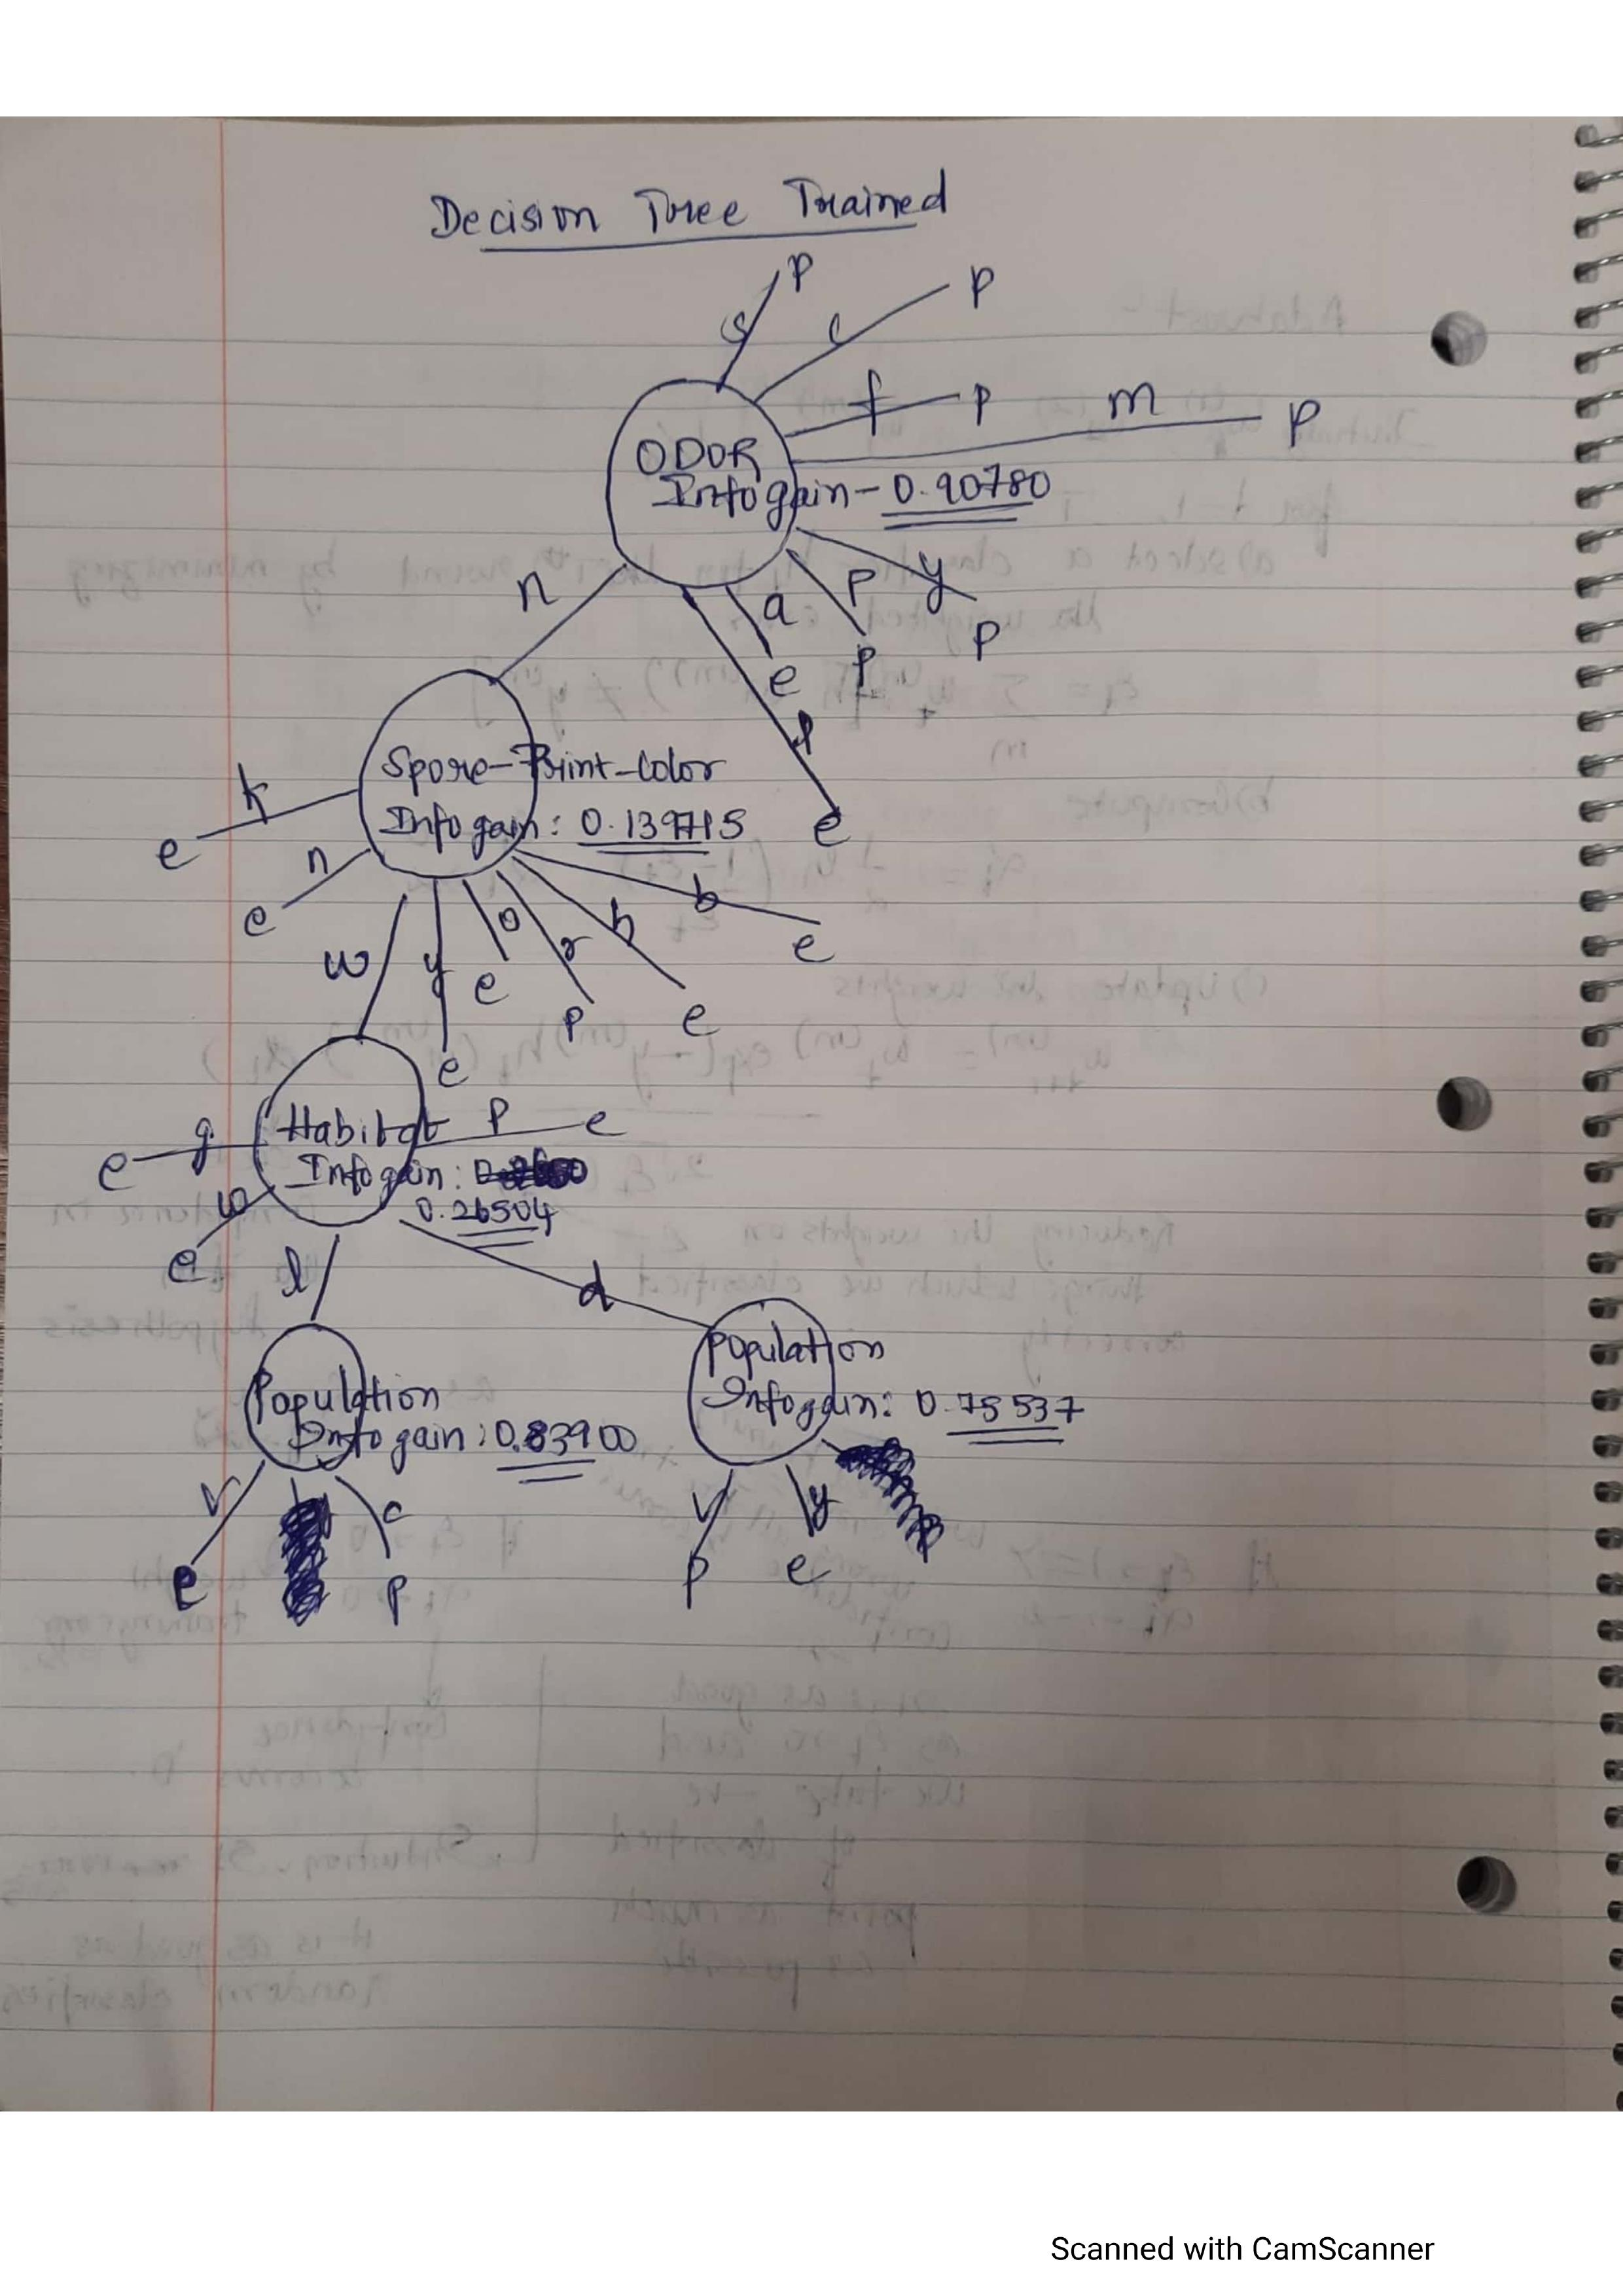

## 2. What is the accuracy of this decision tree on the test data?

In [ ]:
cols = ["Y", "cap-shape", "cap-surface", "cap-color", "bruises", "odor", "gill-attachment", "gill-spacing", "gill-size", "gill-color", "stalk-shape", "stalk-root", "stalk-surface-above-ring", "stalk-surface-below-ring", "stalk-color-above-ring", "stalk-color-below-ring", "veil-type", "veil-color", "ring-number", "ring-type", "spore-print-color", "population", "habitat"]
mushroom_test_df = pd.read_csv('mush_test.data', names = cols, header=None, index_col=False)

In [ ]:
def make_decisions(node, sample=None):
  if node.end_val:
    return node.end_val
  decision_tree_split_col = node.node_val
  next_node = node.children[sample[decision_tree_split_col]]
  return make_decisions(next_node, sample)

In [ ]:
decisions = []
for i in range(len(mushroom_test_df)):
  decision = make_decisions(decision_tree, mushroom_test_df.iloc[i])
  decisions.append(decision)

In [ ]:
count = 0
for index, decision in enumerate(decisions):
    if decision == mushroom_test_df.iloc[index]["Y"]:
        count += 1

In [ ]:
count

3412

In [ ]:
accuracy = count/ len(mushroom_test_df)
accuracy

1.0

## 3. Now consider arbitrary input data. Suppose that you decide to limit yourself to decision trees of height one, i.e., only one split. Is the tree produced by the information gain heuristic optimal on the training data (that is, no other decision tree has higher accuracy)?

If we decide to use information gain as heuristic to split the tree and we decide to limit the height of the tree to 1, then the tree generated will be one of the optimal ones on the training data (Since there could many columns in training data which could result in same information gain).

However, we can guarantee that no other tree will have higher accuracy on the training data.

# Problem 4: Cross-Validation (20 pts)

Using a single tuning set for the hyperparameters can yield an unreliable predictor of the class
label, i.e., maybe it was not a representative sample of the data, plus some data is \wasted" using
this approach. An alternative approach that is particularly applicable for small data sets is $k$-fold
cross-validation.

1. Partition the non-test data into $k$ equally sized buckets.
2. For each possible set of hyperparameters you will train the model using exactly $k-1$ of the
partitions while the held out partition is used as a validation data set.
3. As there are $k$ dierent ways to hold out one partition, all $k$ possibilities are tried and the
average validation set accuracy (as measured by the appropriate held-out data) of the $k$
different models learned for each of the hyperparameter settings is used to select the winning
hyperparameters.
4. Finally, the model is retrained using all of the non-test data with the winning hyperparameters
and then evaluated using the test data.

Apply 10-fold cross validation to fit an SVM with slack classifier (no feature maps) to the data
set wdbc train.data (each row corresponds to a single data observation and the class label +1/-1 is
the first entry in each row). Use the same hyperparameter ranges as Problem 1.1 and the partitions
for cross validation should be selected as equally sized contiguous blocks of data starting from the
first data element. Report the best setting of the hyperparameters and the accuracy on the test
set wdbc test.data.

In [ ]:
import numpy as np
from collections import defaultdict

In [ ]:
def primal_svm_solver(c = None, X = None, Y = None):
  W = np.zeros(len(X[0]))
  b = np.int64(0)
  epochs = 1000000
  index = 0
  step_size = np.float64(0.0001)
  perceptron_loss = 1000
  while perceptron_loss > 0.001 and index < epochs:
    WX = np.sum(np.multiply(W, X), axis=1)
    linear_sum = np.add(WX, b)
    y_linear_sum_mult = np.multiply(Y, linear_sum.reshape(-1, 1))
    y_linear_sum_mult = np.subtract(1, y_linear_sum_mult)
    perceptron_loss = np.maximum(y_linear_sum_mult, 0)
    perceptron_loss = np.multiply(c, np.sum(perceptron_loss)) + np.multiply(0.5, np.matmul(W.T, W))
    
    mask = np.int64((y_linear_sum_mult > 0).astype(int))
    w_grad = np.multiply(-Y, X)
    w_grad = np.multiply(c, w_grad)
    w_grad = np.multiply(mask, w_grad)
    w_grad = np.add(W.reshape(1, -1), w_grad)
    w_grad = np.sum(w_grad, axis=0)
    w_grad = np.multiply(step_size, w_grad)
    W = np.subtract(W, w_grad)

    b_grad = np.multiply(-1, Y)
    b_grad = np.multiply(mask, b_grad)
    b_grad = np.multiply(c, b_grad)
    b_grad = np.sum(b_grad, axis=0)
    b_grad = np.multiply(step_size, b_grad)
    b = np.subtract(b, b_grad)
    index += 1
  return W, b

In [ ]:
def cross_validation(data, k, c):
  k_split_len = len(data) // k
  accuracy = 0
  for i in range(k):
    left_index = i * k_split_len
    middle_index = left_index + k_split_len
    split_array = np.split(data, [left_index, middle_index, len(data)])
    train = np.concatenate((split_array[0], split_array[2]), axis=0)
    valid = split_array[1]

    Y = train[:,0]
    Y = np.array(list(map(lambda x: 1 if x == 1 else -1, Y)))
    X = train[:,1:]
    Y = Y.reshape(-1,1)
    W, b = primal_svm_solver(c = c, X = X, Y = Y)
    Y_valid = valid[:,0]
    Y_valid = np.array(list(map(lambda x: 1 if x == 1 else -1, Y_valid)))
    X_valid = valid[:,1:]
    Y_valid = Y_valid.reshape(-1,1)

    WX = np.sum(np.multiply(W, X_valid), axis=1)
    linear_sum = WX + b
    correct_val = 0
    num_samples = len(valid)
    for i in range(num_samples):
      if (Y_valid[i] * linear_sum[i]) >= 0:
        correct_val += 1
    accuracy += (correct_val / num_samples)
  accuracy = (accuracy / k)
  return accuracy

In [ ]:
wdbc_train = np.genfromtxt('wdbc_train.data',delimiter=',')
wdbc_validation_metrics = defaultdict(lambda: defaultdict(int))
best_accuracy = None
best_c = None
for c in [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000]:
  c_val = np.float64(c)
  acc = cross_validation(wdbc_train, 10, c_val)
  wdbc_validation_metrics[c]['accuracy'] = acc
  if not best_accuracy or acc > best_accuracy:
    best_accuracy = acc
    best_c = c

In [ ]:
wdbc_validation_metrics

defaultdict(<function __main__.<lambda>>,
            {0.0001: defaultdict(int, {'accuracy': 0.8066666666666666}),
             0.001: defaultdict(int, {'accuracy': 0.6433333333333333}),
             0.01: defaultdict(int, {'accuracy': 0.6899999999999998}),
             0.1: defaultdict(int, {'accuracy': 0.6433333333333333}),
             1: defaultdict(int, {'accuracy': 0.64}),
             10: defaultdict(int, {'accuracy': 0.6133333333333333}),
             100: defaultdict(int, {'accuracy': 0.6266666666666667}),
             1000: defaultdict(int, {'accuracy': 0.7366666666666668}),
             10000: defaultdict(int, {'accuracy': 0.6366666666666667})})

In [ ]:
best_c

0.0001

In [ ]:
best_accuracy

0.8066666666666666

In [ ]:
wdbc_train = np.genfromtxt('wdbc_train.data',delimiter=',')
num_samples = len(wdbc_train)
Y = wdbc_train[:,0]
Y = np.array(list(map(lambda x: 1 if x == 1 else -1, Y)))
X = wdbc_train[:,1:]
Y = Y.reshape(-1,1)
W, b = primal_svm_solver(c = np.float64(best_c), X = X, Y = Y)

In [ ]:
wdbc_test = np.genfromtxt('wdbc_test.data',delimiter=',')
num_samples = len(wdbc_test)
Y = wdbc_test[:,0]
Y = np.array(list(map(lambda x: 1 if x == 1 else -1, Y)))
X = wdbc_test[:,1:]
Y = Y.reshape(-1,1)
WX = np.sum(np.multiply(W, X), axis=1)
linear_sum = WX + b
correct_val = 0
for i in range(num_samples):
  if Y[i] * linear_sum[i] >= 0:
    correct_val += 1
accuracy = correct_val / num_samples
test_accuracy = accuracy
print(test_accuracy)

0.8986486486486487
